In [3]:
!pip install tensordict

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 33.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 52.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 43.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━

In [4]:
!pip install torchrl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 16.3 MB/s eta 0:00:00


In [5]:
!pip install rl4co

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 192.1/192.1 kB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.6/44.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 70.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 840.4/840.4 kB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.6/801.6 kB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 14.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.5/263.5 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.

In [6]:
from typing import Optional

import matplotlib.pyplot as plt
import torch
from torch import Tensor

from tensordict.tensordict import TensorDict
from torchrl.data import (
    BoundedTensorSpec,
    CompositeSpec,
    UnboundedContinuousTensorSpec,
    UnboundedDiscreteTensorSpec,
)

from rl4co.envs.common.base import RL4COEnvBase
from rl4co.utils.ops import gather_by_index, get_tour_length

In [7]:
class TensorDict(dict):
    def __init__(self, data=None, batch_size=None):
        super().__init__(data if data is not None else {})
        self.batch_size = batch_size

    def update(self, *args, **kwargs):
        super().update(*args, **kwargs)
        return self

    def to(self, device):
        for key, value in self.items():
            if isinstance(value, Tensor):
                self[key] = value.to(device)
        return self

    def detach(self):
        for key, value in self.items():
            if isinstance(value, Tensor):
                self[key] = value.detach()
        return self

    def cpu(self):
        return self.to('cpu')

    def is_empty(self):
        return len(self) == 0


In [8]:
class RL4COEnvBase:
    def __init__(self, **kwargs):
        pass

In [9]:
class PDPEnv(RL4COEnvBase):
    """Pickup and Delivery Problem (PDP) environment.
    The environment is made of num_loc + 1 locations (cities):
        - 1 depot
        - `num_loc` / 2 pickup locations
        - `num_loc` / 2 delivery locations
    The goal is to visit all the pickup and delivery locations in the shortest path possible starting from the depot
    The conditions is that the agent must visit a pickup location before visiting its corresponding delivery location

    Args:
        num_loc: number of locations (cities) in the TSP
        td_params: parameters of the environment
        seed: seed for the environment
        device: device to use.  Generally, no need to set as tensors are updated on the fly
    """

    name = "pdp"

    def __init__(
        self,
        num_loc: int = 20,
        min_loc: float = 0,
        max_loc: float = 1,
        td_params: TensorDict = None,
        device: torch.device = torch.device('cpu'),
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.num_loc = num_loc
        self.min_loc = min_loc
        self.max_loc = max_loc
        self.device = device
        self._make_spec(td_params)

    # staticmethod
    # def _step(td: TensorDict) -> TensorDict:
    #     current_node = td["action"].unsqueeze(-1)

    #     num_loc = td["locs"].shape[-2] - 1  # except depot

    #     # Pickup and delivery node pair of selected node
    #     new_to_deliver = (current_node + num_loc // 2) % (num_loc + 1)

    #     # Set available to 0 (i.e., we visited the node)
    #     available = td["available"].scatter(
    #         -1, current_node.expand_as(td["action_mask"]), 0
    #     )

    #     to_deliver = td["to_deliver"].scatter(
    #         -1, new_to_deliver.expand_as(td["to_deliver"]), 1
    #     )

    #     # Action is feasible if the node is not visited and is to deliver
    #     # action_mask = torch.logical_and(available, to_deliver)
    #     action_mask = available & to_deliver

    #     # We are done there are no unvisited locations
    #     done = torch.count_nonzero(available, dim=-1) == 0

    #     # The reward is calculated outside via get_reward for efficiency, so we set it to 0 here
    #     reward = torch.zeros_like(done)

    #     # Update step
    #     td.update(
    #         {
    #             "current_node": current_node,
    #             "available": available,
    #             "to_deliver": to_deliver,
    #             "i": td["i"] + 1,
    #             "action_mask": action_mask,
    #             "reward": reward,
    #             "done": done,
    #         }
    #     )
    #     return td

    # 상태 업데이트
    def _step(self, td: TensorDict) -> TensorDict:
      current_node = td["action"].squeeze(1)  # [batch_size, 1] -> [batch_size]

    # 'available'에서 현재 노드 방문 처리
    # Boolean indexing을 사용하여 'available'에서 현재 노드를 False로 설정
      batch_indices = torch.arange(td["available"].size(0), device=self.device)  # 배치 내 각 인덱스
      td["available"][batch_indices, current_node] = False

    # 모든 위치 방문 시 'done' 설정
      done = ~td["available"].any(dim=1)  # 모든 노드가 방문되었는지 확인

    # 'reward'는 외부에서 계산되므로 여기서는 0으로 설정
    # 실제 사용 시 필요에 따라 적절한 보상 계산 로직을 추가
      reward = torch.zeros_like(done, dtype=torch.float)

    # 상태 업데이트
      td.update({
        "current_node": current_node.unsqueeze(-1),  # 차원을 [batch_size, 1]로 복원
        "available": td["available"],
        "reward": reward,
        "done": done,
      })

      return td



    def _reset(self, td: Optional[TensorDict] = None, batch_size=None) -> TensorDict:
        if batch_size is None:
            batch_size = self.batch_size if td is None else td.batch_size

        if td is None or td.is_empty():
            td = self.generate_data(batch_size=batch_size)

        #self.to(td.device)

        locs = torch.cat((td["depot"][:, None, :], td["locs"]), -2)

        # Pick is 1, deliver is 0 [batch_size, graph_size+1], [1,1...1, 0...0]
        to_deliver = torch.cat(
            [
                torch.ones(
                    *batch_size,
                    self.num_loc // 2 + 1,
                    dtype=torch.bool,
                    device=self.device,
                ),
                torch.zeros(
                    *batch_size, self.num_loc // 2, dtype=torch.bool, device=self.device
                ),
            ],
            dim=-1,
        )

        # Cannot visit depot at first step # [0,1...1] so set not available
        available = torch.ones(
            (*batch_size, self.num_loc + 1), dtype=torch.bool, device=self.device
        )
        action_mask = ~available.contiguous()  # [batch_size, graph_size+1]
        action_mask[..., 0] = 1  # First step is always the depot

        # Other variables
        current_node = torch.zeros(
            (*batch_size, 1), dtype=torch.int64, device=self.device
        )
        i = torch.zeros((*batch_size, 1), dtype=torch.int64, device=self.device)

        return TensorDict(
            {
                "locs": locs,
                "current_node": current_node,
                "to_deliver": to_deliver,
                "available": available,
                "i": i,
                "action_mask": action_mask,
            },
            batch_size=batch_size,
        )

    def _make_spec(self, td_params: TensorDict):
        """Make the observation and action specs from the parameters."""
        self.observation_spec = CompositeSpec(
            locs=BoundedTensorSpec(
                low=self.min_loc,
                high=self.max_loc,
                shape=(self.num_loc + 1, 2),
                dtype=torch.float32,
            ),
            current_node=UnboundedDiscreteTensorSpec(
                shape=(1),
                dtype=torch.int64,
            ),
            to_deliver=UnboundedDiscreteTensorSpec(
                shape=(1),
                dtype=torch.int64,
            ),
            i=UnboundedDiscreteTensorSpec(
                shape=(1),
                dtype=torch.int64,
            ),
            action_mask=UnboundedDiscreteTensorSpec(
                shape=(self.num_loc + 1),
                dtype=torch.bool,
            ),
            shape=(),
        )
        self.action_spec = BoundedTensorSpec(
            shape=(1,),
            dtype=torch.int64,
            low=0,
            high=self.num_loc + 1,
        )
        self.reward_spec = UnboundedContinuousTensorSpec(shape=(1,))
        self.done_spec = UnboundedDiscreteTensorSpec(shape=(1,), dtype=torch.bool)

    @staticmethod
    def get_reward(td, actions) -> TensorDict:
        # assert (actions[:, 0] == 0).all(), "Not starting at depot"
        assert (
            torch.arange(actions.size(1), out=actions.data.new())
            .view(1, -1)
            .expand_as(actions)
            == actions.data.sort(1)[0]
        ).all(), "Not visiting all nodes"

        visited_time = torch.argsort(
            actions, 1
        )  # index of pickup less than index of delivery
        assert (
            visited_time[:, 1 : actions.size(1) // 2 + 1]
            < visited_time[:, actions.size(1) // 2 + 1 :]
        ).all(), "Deliverying without pick-up"

        # Gather locations in the order of actions and get reward = -(total distance)
        locs_ordered = gather_by_index(td["locs"], actions)  # [batch, graph_size+1, 2]
        return -get_tour_length(locs_ordered)

    def generate_data(self, batch_size) -> TensorDict:
        batch_size = [batch_size] if isinstance(batch_size, int) else batch_size

        # Initialize the locations (including the depot which is always the first node)
        locs_with_depot = (
            torch.FloatTensor(*batch_size, self.num_loc + 1, 2)
            .uniform_(self.min_loc, self.max_loc)
            .to(self.device)
        )

        return TensorDict(
            {
                "locs": locs_with_depot[..., 1:, :],
                "depot": locs_with_depot[..., 0, :],
            },
            batch_size=batch_size,
        )

    @staticmethod
    def render(td: TensorDict, actions=None, ax=None):
        import matplotlib.pyplot as plt

        markersize = 8

        td = td.detach().cpu()
        # if batch_size greater than 0 , we need to select the first batch element
        if td.batch_size != torch.Size([]):
          td_extracted = {key: value[0] for key, value in td.items()}
        else:
          td_extracted = td

    # 추출된 TensorDict 사용
        td = td_extracted

        # Variables
        init_deliveries = td["to_deliver"][1:]
        delivery_locs = td["locs"][1:][~init_deliveries.bool()]
        pickup_locs = td["locs"][1:][init_deliveries.bool()]
        depot_loc = td["locs"][0]
        actions = actions if actions is not None else td["action"]

        fig, ax = plt.subplots()

        # Plot the actions in order
        for i in range(len(actions)):
            from_node = actions[i]
            to_node = (
                actions[i + 1] if i < len(actions) - 1 else actions[0]
            )  # last goes back to depot
            from_loc = td["locs"][from_node]
            to_loc = td["locs"][to_node]
            ax.plot([from_loc[0], to_loc[0]], [from_loc[1], to_loc[1]], "k-")
            ax.annotate(
                "",
                xy=(to_loc[0], to_loc[1]),
                xytext=(from_loc[0], from_loc[1]),
                arrowprops=dict(arrowstyle="->", color="black"),
                annotation_clip=False,
            )

        # Plot the depot location
        ax.plot(
            depot_loc[0],
            depot_loc[1],
            "g",
            marker="s",
            markersize=markersize,
            label="Depot",
        )

        # Plot the pickup locations
        for i, pickup_loc in enumerate(pickup_locs):
            ax.plot(
                pickup_loc[0],
                pickup_loc[1],
                "r",
                marker="^",
                markersize=markersize,
                label="Pickup" if i == 0 else None,
            )

        # Plot the delivery locations
        for i, delivery_loc in enumerate(delivery_locs):
            ax.plot(
                delivery_loc[0],
                delivery_loc[1],
                "b",
                marker="v",
                markersize=markersize,
                label="Delivery" if i == 0 else None,
            )

        # Setup limits and show
        ax.set_xlim(-0.05, 1.05)
        ax.set_ylim(-0.05, 1.05)

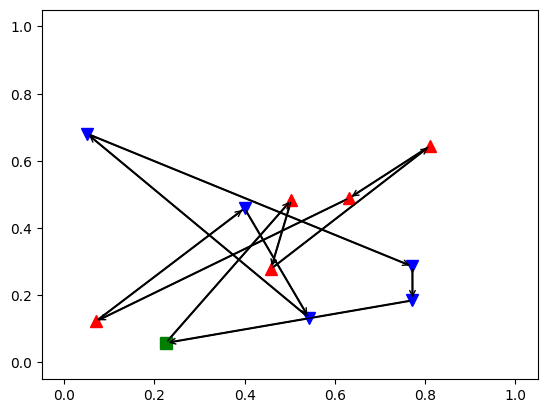

In [10]:
num_loc = 10
env = PDPEnv(num_loc)

# Generate example data for a single instance (batch_size=1)
td = env.generate_data(batch_size=1)

# Reset the environment to start with the generated example data
td_reset = env._reset(td)

# Define multiple actions to simulate

actions = list(range(num_loc+1))

# Apply each action to the environment
for action_value in actions:
    action_tensor = torch.tensor([[action_value]])  # Convert action to tensor
    td_reset = env._step(td_reset.update({"action": action_tensor}))  # Apply the action and update the environment state

# Assuming the render function expects 0-based indexing for actions
# but the locations are 1-based (with the depot at index 0), adjust actions by -1
adjusted_actions = [a - 1 for a in actions]

# Render the last environment state after all actions have been applied
env.render(td_reset, adjusted_actions)


100%|██████████| 10000/10000 [00:10<00:00, 953.64it/s]


Best distance: 1.096812129020691
Best path: [0, 10, 6, 3, 5, 9, 2, 7, 4, 8, 1]


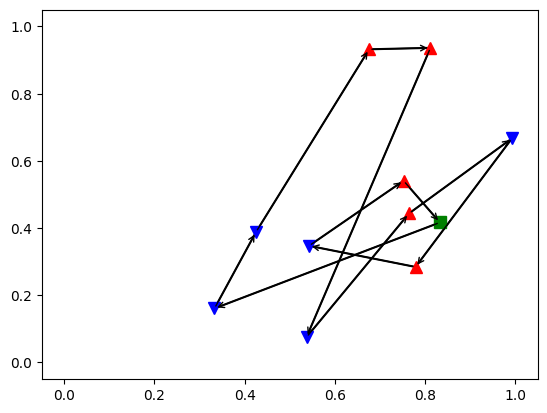

In [25]:
import torch
import random
from tqdm import tqdm

def calculate_total_distance(locations, actions):
    total_distance = 0.0
    prev_loc = locations[0]  # Start from the depot
    for action in actions:
        current_loc = locations[action]  # Get the current location
        total_distance += torch.norm(current_loc - prev_loc).item()  # Calculate the distance
        prev_loc = current_loc  # Update the previous location
    total_distance += torch.norm(prev_loc - locations[0]).item()  # Return to the depot
    return total_distance

num_locations = 10
num_epochs = 10000
best_distance = float('inf')
best_path = None

env = PDPEnv(num_loc=num_locations)

for epoch in tqdm(range(num_epochs)):
    td_reset = env._reset(env.generate_data(batch_size=1))

    # Initialize the tour with the depot as the starting point
    actions = [0]  # Start at the depot

    # Generate a random tour excluding the depot
    actions += random.sample(range(1, num_locations + 1), num_locations)

    # Apply actions, making sure to start at the depot
    for action_value in actions:
        action_tensor = torch.tensor([[action_value]])  # Keep action as it is
        td_reset = env._step(td_reset.update({"action": action_tensor}))

    # Calculate the total distance for the tour
    current_distance = calculate_total_distance(td_reset['locs'].reshape(-1), actions)

    # Save the best tour found so far
    if current_distance < best_distance:
        best_distance = current_distance
        best_path = actions

# Render the environment state with the best path
# Here we need to convert the best path to the expected format by the render method, if necessary
# If the render method expects 0-based indices and the best path is 1-indexed, we need to adjust it
# If the best path already includes the depot as the first and last action, it might not need any changes
env.render(env._reset(env.generate_data(batch_size=1)), best_path)
print(f"Best distance: {best_distance}")
print(f"Best path: {best_path}")
